In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



620

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | derzhavinsk
Processing Record 2 of Set 1 | zolotinka
City not found. Skipping...
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | macenta
Processing Record 5 of Set 1 | boa vista
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | jadu
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | kibala
Processing Record 12 of Set 1 | pangnirtung
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | warqla
City not found. Skipping...
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | umm durman
City not found. Skipping...
Processing Record 21 of Set 1 | ondorhaan


Processing Record 32 of Set 4 | antropovo
Processing Record 33 of Set 4 | dryden
Processing Record 34 of Set 4 | quirinopolis
Processing Record 35 of Set 4 | college
Processing Record 36 of Set 4 | port keats
Processing Record 37 of Set 4 | asau
Processing Record 38 of Set 4 | talawdi
City not found. Skipping...
Processing Record 39 of Set 4 | tono
Processing Record 40 of Set 4 | povenets
Processing Record 41 of Set 4 | kurchum
Processing Record 42 of Set 4 | ribeira grande
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | madingou
Processing Record 46 of Set 4 | mongoumba
Processing Record 47 of Set 4 | huangnihe
Processing Record 48 of Set 4 | santarem
Processing Record 49 of Set 4 | jimeta
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | chapais
Processing Record 2 of Set 5 | tocache
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | saryshagan
City n

Processing Record 27 of Set 8 | shinpokh
Processing Record 28 of Set 8 | ambon
Processing Record 29 of Set 8 | naze
Processing Record 30 of Set 8 | kralendijk
Processing Record 31 of Set 8 | fairbanks
Processing Record 32 of Set 8 | homer
Processing Record 33 of Set 8 | alyangula
Processing Record 34 of Set 8 | salas
Processing Record 35 of Set 8 | sandnessjoen
Processing Record 36 of Set 8 | tromso
Processing Record 37 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 38 of Set 8 | christchurch
Processing Record 39 of Set 8 | frohnleiten
Processing Record 40 of Set 8 | thongwa
Processing Record 41 of Set 8 | pasighat
Processing Record 42 of Set 8 | kiruna
Processing Record 43 of Set 8 | del rio
Processing Record 44 of Set 8 | salvador
Processing Record 45 of Set 8 | biak
Processing Record 46 of Set 8 | elko
Processing Record 47 of Set 8 | tuatapere
Processing Record 48 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 49 of Set 8 | hofn
Processing R

Processing Record 15 of Set 12 | dubai
Processing Record 16 of Set 12 | pangkalanbuun
Processing Record 17 of Set 12 | sakakah
Processing Record 18 of Set 12 | raga
Processing Record 19 of Set 12 | khandyga
Processing Record 20 of Set 12 | bull savanna
Processing Record 21 of Set 12 | gat
Processing Record 22 of Set 12 | meyungs
City not found. Skipping...
Processing Record 23 of Set 12 | bay city
Processing Record 24 of Set 12 | betare oya
Processing Record 25 of Set 12 | panagjuriste
City not found. Skipping...
Processing Record 26 of Set 12 | jonesboro
Processing Record 27 of Set 12 | general roca
Processing Record 28 of Set 12 | broken hill
Processing Record 29 of Set 12 | san patricio
Processing Record 30 of Set 12 | moa
Processing Record 31 of Set 12 | mutoko
Processing Record 32 of Set 12 | zhangye
Processing Record 33 of Set 12 | veraval
Processing Record 34 of Set 12 | hobyo
Processing Record 35 of Set 12 | san vicente de canete
Processing Record 36 of Set 12 | zarechnyy
Proce

In [15]:
len(city_data)

569

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Derzhavinsk,51.1000,66.3167,9.46,92,100,4.76,KZ,2022-01-27 16:57:04
1,Bethel,41.3712,-73.4140,28.09,53,40,7.76,US,2022-01-27 16:57:05
2,Macenta,8.5435,-9.4710,92.01,12,14,2.93,GN,2022-01-27 16:57:05
3,Boa Vista,2.8197,-60.6733,89.58,43,75,8.05,BR,2022-01-27 16:54:28
4,Provideniya,64.3833,-173.3000,-2.27,95,80,1.57,RU,2022-01-27 16:57:06
5,Mataura,-46.1927,168.8643,41.49,94,98,2.13,NZ,2022-01-27 16:57:06
6,Mount Gambier,-37.8333,140.7667,66.11,88,100,4.61,AU,2022-01-27 16:57:06
7,Jadu,31.9530,12.0261,45.43,49,100,1.50,LY,2022-01-27 16:57:07
8,Hilo,19.7297,-155.0900,67.62,81,14,8.01,US,2022-01-27 16:57:07
9,Kibala,9.1104,18.3463,93.15,18,0,9.22,TD,2022-01-27 16:57:07


In [18]:
# Reorder columns in DataFrame
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Derzhavinsk,KZ,2022-01-27 16:57:04,51.1000,66.3167,9.46,92,100,4.76
1,Bethel,US,2022-01-27 16:57:05,41.3712,-73.4140,28.09,53,40,7.76
2,Macenta,GN,2022-01-27 16:57:05,8.5435,-9.4710,92.01,12,14,2.93
3,Boa Vista,BR,2022-01-27 16:54:28,2.8197,-60.6733,89.58,43,75,8.05
4,Provideniya,RU,2022-01-27 16:57:06,64.3833,-173.3000,-2.27,95,80,1.57
...,...,...,...,...,...,...,...,...,...
564,Dumai,ID,2022-01-27 17:11:57,1.6833,101.4500,74.32,81,65,3.33
565,Zemetchino,RU,2022-01-27 17:11:57,53.4973,42.6163,-0.31,99,70,5.64
566,Inverell,AU,2022-01-27 17:11:57,-29.7833,151.1167,67.66,94,99,4.18
567,Arcachon,FR,2022-01-27 17:11:58,44.5875,-1.0519,42.85,75,0,0.00


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

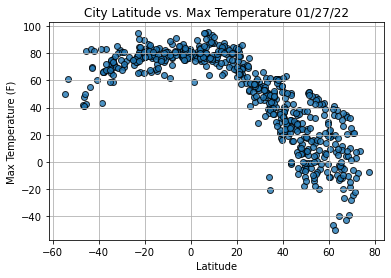

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

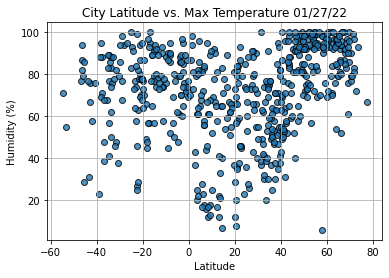

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

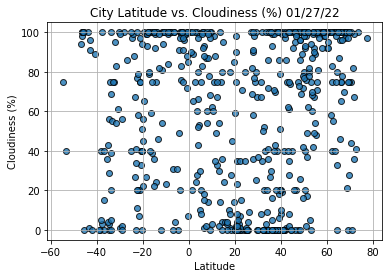

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

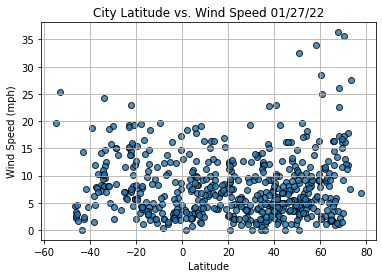

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()